<h1> Healthcare Stroke Dataset </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels
from statsmodels.stats import power
import math

<h2> Import Data

In [2]:
stroke = pd.read_csv('train_2v.csv')
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [3]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


<h3> Analysis of Descriptions </h3>

Here we can see the information describing numerical features. As we can see from the table above, hypertension, heart disease and stroke are given as binary information. Whereas, age, BMI and average glucose level are continuous data. We looked into some unusual features such as min and max BMI which were 10 and 97 respectively. Both of these were both physically possible values, the 10 coming from the youngest patients and 97 being well within the highest range of BMI ever found in homo sapiens.

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
stroke.groupby(['stroke']).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36317.641293,41.741565,0.090598,0.044231,104.021590,28.585371
1,36788.836526,68.143448,0.255428,0.226054,129.582669,29.868118


In [6]:
stroke.bmi.fillna(stroke.bmi.mean(), inplace=True)

stroke.bmi.unique()

array([18.        , 39.2       , 17.6       , 35.9       , 19.1       ,
       50.1       , 17.7       , 27.        , 32.3       , 54.6       ,
       35.        , 22.        , 39.4       , 26.1       , 42.4       ,
       33.        , 19.7       , 22.5       , 24.6       , 25.2       ,
       41.8       , 60.9       , 31.5       , 27.3       , 23.7       ,
       24.5       , 28.4       , 26.9       , 26.7       , 31.2       ,
       25.        , 25.4       , 27.5       , 16.        , 31.6       ,
       25.1       , 30.9       , 24.8       , 23.4       , 29.4       ,
       18.3       , 20.        , 19.5       , 36.        , 27.7       ,
       28.5       , 26.8       , 33.6       , 29.1       , 34.9       ,
       35.3       , 26.4       , 40.1       , 43.1       , 36.7       ,
       29.3       , 21.2       , 36.6       , 21.4       , 27.9       ,
       34.3       , 31.        , 38.7       , 27.6       , 16.5       ,
       22.8       , 35.4       , 24.3       , 25.7       , 21.9 

In [7]:
stroke.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

<h3> Removal of Features </h3>

As we can see there are many missing values in the smoking status column, this makes 30.63% missing values within the feature. Therefore, we will drop this feature, despite the interesting insights we could glean from this information.

In [8]:
stroke.drop(columns = 'smoking_status', inplace = True)

<h2> EDA with Age & Other Features</h2>

In [9]:
stroke.groupby(stroke.age // 10 * 10).sum()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,,,
0.0,150251486,18063.6,1,3,395809.47,80847.462764,1
10.0,153224273,62788.0,9,1,392467.82,103899.087188,1
20.0,189978474,127852.0,51,4,488553.26,147377.543378,2
30.0,197907954,189138.0,238,21,535296.68,167312.249952,20
40.0,230257181,282271.0,537,132,645872.15,196672.342179,42
50.0,249503232,368026.0,901,342,743641.77,211787.274713,125
60.0,198615187,346496.0,1018,551,640782.30,167874.977016,162
70.0,154577972,321738.0,956,703,519893.82,125862.851824,302
80.0,52238819,115884.0,350,305,172234.08,39824.877111,128


Text(0, 0.5, 'Count')

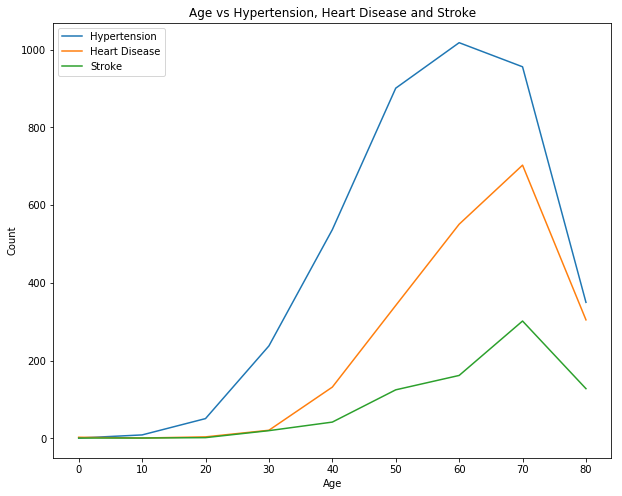

In [10]:
df1 = stroke.groupby(stroke.age // 10 * 10).sum()

plt.figure(figsize = (10,8))
plt.plot(df1.index, df1.hypertension, label = 'Hypertension')
plt.plot(df1.index, df1.heart_disease, label = 'Heart Disease')
plt.plot(df1.index, df1.stroke,label = 'Stroke')
plt.legend()
plt.title('Age vs Hypertension, Heart Disease and Stroke')
plt.xlabel('Age')
plt.ylabel('Count')

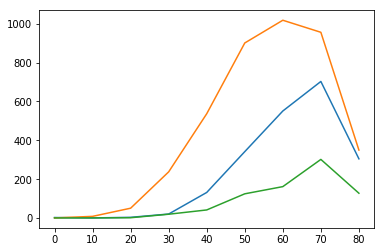

In [11]:

plt.plot(df1.index, df1.heart_disease)
plt.plot(df1.index, df1.hypertension)
plt.plot(df1.index, df1.stroke)

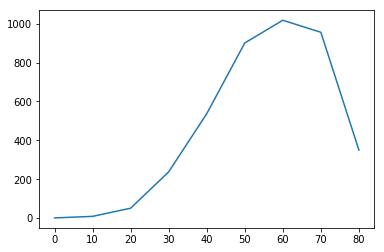

In [12]:
plt.plot(df1.index, df1.hypertension)

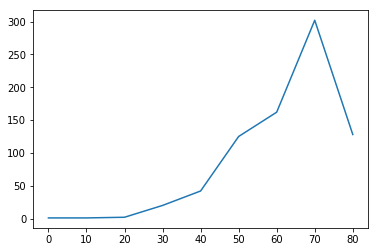

In [13]:
plt.plot(df1.index, df1.stroke)

In [14]:
stroke.groupby(stroke.age // 10 * 10).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,,,
0.0,35064.524154,4.215543,0.000233,0.000700,92.370938,18.867553,0.000233
10.0,36257.518457,14.857549,0.002130,0.000237,92.869811,24.585681,0.000237
20.0,36534.321923,24.586923,0.009808,0.000769,93.952550,28.341835,0.000385
30.0,36167.389254,34.564693,0.043494,0.003838,97.824686,30.576069,0.003655
40.0,36427.334441,44.656067,0.084955,0.020883,102.178793,31.114118,0.006645
50.0,36859.688580,54.369331,0.133107,0.050524,109.859916,31.287823,0.018467
60.0,36787.402667,64.177811,0.188553,0.102056,118.685368,31.093717,0.030006
70.0,35981.837058,74.892458,0.222533,0.163641,121.018115,29.297684,0.070298
80.0,36479.622207,80.924581,0.244413,0.212989,120.275196,27.810668,0.089385


<h2> Impact of Gender on Stroke

<h3> Hypothesis </h3>

H<sub>0</sub> : $\mu$<sub>Males with Stroke</sub> = $\mu$<sub>Females with Stroke</sub>                               
H<sub>a</sub> : $\mu$<sub>Males with Stroke</sub> != $\mu$<sub>Females with Stroke</sub> 

Statistic Methodology: ANOVA TESTS 

ANOVA is used to prove/disprove if gender has impacts on having stroke. ANOVA is validated under assumptions of normality, homogeneity of variance,independent observations are true. We will check these assumptions with a linear models.

In [15]:
stroke.groupby(['gender']).sum()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,931555379,1096863.16,2253,846,2648718.77,737662.327641,431
Male,644609088,735009.44,1808,1216,1884857.25,503486.618332,352
Other,390111,384.00,0,0,975.33,309.720154,0


In [16]:
df = stroke[stroke.gender !='Other']
# forms a df with gender column without 'Other' values
# in another word we drop 'Other' values in gender

In [17]:
# find the number of male, female with and without stroke respectively:
num_female_stroke = len(df[(df['gender']== 'Female') & (df['stroke']==1)])
num_males_stroke = len(df[(df['gender']== 'Male') & (df['stroke']==1)])
num_female_no_stroke = len(df[(df['gender']== 'Female') & (df['stroke']== 0)])
num_males_no_stroke = len(df[(df['gender']== 'Male') & (df['stroke']==0)])
print(num_female_stroke,num_males_stroke, num_female_no_stroke,num_males_no_stroke)

431 352 25234 17372


In [18]:
# probability of male having stroke in a male population
p_males_stroke =num_males_stroke/(num_males_stroke+num_males_no_stroke) 
p_males_stroke

0.019860076732114647

In [19]:
# probability of a female having stroke in a female population
P_female_stroke = num_female_stroke/(num_female_stroke + num_female_no_stroke )
P_female_stroke

0.016793298266121175

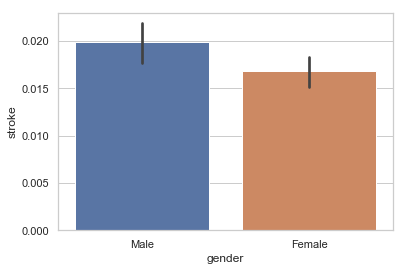

In [20]:
sns.set(style="whitegrid")
sns.barplot(x="gender",y="stroke",data=df)
# graph shows the probability of a male and female having stroke 
#  P(male_stroke) = 0.0199, and P(female_stroke) = 0.0168

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
df['stroke'].groupby(df['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,25665.0,0.016793,0.128499,0.0,0.0,0.0,0.0,1.0
Male,17724.0,0.019860,0.139523,0.0,0.0,0.0,0.0,1.0


In [23]:
stats.f_oneway(df['stroke'][df['gender']== 'Female'],
               df['stroke'][df['gender']== 'Male'])

F_onewayResult(statistic=5.564813525658821, pvalue=0.018329368548732357)

<h4> F-Statistic </h4>

The F-statistic = 5.565 and the p-value = 0.018 indicating that there is an significant effect of gender on stroke. But we don't know where the difference is.                                                                    


We create our model using: formula = Contrl_col +C(gender) where our control attribute is stroke and gender is a factor in having stroke.

In [24]:
# Generating the ANOVA Table in order to analyze the influence of gender on stroke
formula = 'stroke~C(gender) '
lm = ols(formula,df).fit()
aov_table = sm.stats.anova_lm(lm,typ=2)
print(aov_table)

               sum_sq       df         F    PR(>F)
C(gender)    0.098603      1.0  5.564814  0.018329
Residual   768.771341  43387.0       NaN       NaN


If the null hypothesis is true, we expect F to have a value close to 1.0 most of the time. F = 2.88 meaning that the variation among males and female group are as we expected Note that the assumptions apply to the residuals and not the variables. ANOVA is validate if assumptions include: Normality, homogeneity of variance, and independent observation are true.We will check these assumptions with the linear models below.

In [25]:
lm = ols(formula,df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.565
Date:                Mon, 05 Aug 2019   Prob (F-statistic):             0.0183
Time:                        16:43:13   Log-Likelihood:                 25931.
No. Observations:               43389   AIC:                        -5.186e+04
Df Residuals:                   43387   BIC:                        -5.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0168      0.001     20.211      0.000       0.015       0.018
C(gender)[T.Male]     0.0031      0.001      2.359      0.018       0.001       0.006
==============================================================================
Omnibus:                    54364.347   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4974818.776
Skew:                           7.240   Prob(JB):                         0.00
Kurtosis:                      53.419   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3> Conclusion </h3>

Jarque-Bera(JB,Prob(jb) is p-value and p-value = 0 . JB tests the assumption of normality Omnibus(Prob(omnibus) is p-value and p- value = 0 . 

Omnibus tests the assumption of homogeneity of variance 

Durbin -Watson tests = 2.003 . Durbin-Watson tests is to detect the presence of autocorrelation.  As all the assumptions are true, and the F value is greater than 1.

We can therefore reject our null hypothesis. Indeed, gender has impact on having stroke.

<h2> Hypertension & Stroke </h2>

<h3> Hypothesis </h3>

H<sub>0</sub> = P<sub>Stroke|Hypertension</sub>  =  P<sub>Stroke|No Hypertension</sub>                               
H<sub>a</sub> = P<sub>Stroke|Hypertension</sub>  $\neq$  P<sub>Stroke|No Hypertension</sub>

H<sub>0</sub> = the proportions of stroke given hypertension and stroke given no hypertension are equal.             
H<sub>a</sub> = the the proportions of stroke given hypertension and stroke given no hypertension are different

Statistical Methodology: Two Proportion Test & Cohen's h                                                             
A two propotion test is used to verify the difference between two proportions within a population. Cohen's h is used as a verification metric in this example.



In [26]:
stroke.groupby(['hypertension']).sum()

,id,age,heart_disease,avg_glucose_level,bmi,stroke
hypertension,,,,,,
0,1427284047,1583341.6,1547,4022947.37,1.110448e+06,583
1,149270531,248915.0,515,511603.98,1.310108e+05,200


In [27]:
stroke.groupby(['hypertension']).count()
#P(S|H)= 4.924%
#P(S|NH) = 1.482%
#ratio = 3.323

,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
hypertension,,,,,,,,,,
0,39339,39339,39339,39339,39339,39339,39339,39339,39339,39339
1,4061,4061,4061,4061,4061,4061,4061,4061,4061,4061


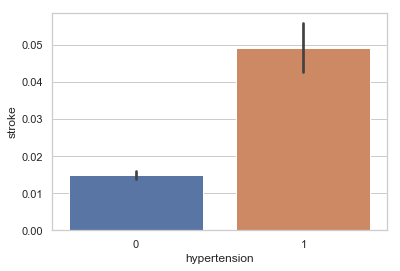

In [28]:
sns.set(style="whitegrid")
sns.barplot(x="hypertension",y="stroke",data=df)

In [29]:
def zscoreproportions(n1,n2,p1,p2):
    p = (n1*p1+n2*p2)/(n1+n2)
    stderr = np.sqrt(p*(1-p)*((1/n1)+(1/n2)))
    z = (p1-p2)/stderr
    return z

In [30]:
n1 = 4061
n2 = 39339
p1 = 0.049249
p2 = 0.014820

zscoreproportions(n1,n2,p1,p2)

15.693650367853913

In [31]:
def cohensh(p1,p2):
    phi1 = 2*np.arcsin(np.sqrt(p1))
    phi2 = 2*np.arcsin(np.sqrt(p2))
    h = np.absolute(phi1-phi2)
    return h

In [32]:
cohensh(p1,p2)

0.20348836055520023

<h3> Conclusion </h3>

alpha = 0.05                                                                                                         
zscore = 1.96


Using a confidence level of 95% we get an alpha zscore of 1.96, therefore our z-score of 15.7 provides significant confidence that we regject the null hypothesis (that the proportions are equal).

The probability of stroke given hypertension P(S|Hyp) = 0.0492                                                       
The probability of stroke given no hypertension P(S|NoHyp) = 0.0148

Therefore, there is a much higher rate of stroke in those with hypertension.

This equation information was pulled from the following website: https://stattrek.com/hypothesis-test/difference-in-proportions.aspx

<h4> Cohen's H </h4>

The Cohen's h provides the effect size between two proportions, the values given by Cohen are as follows:

h = 0.20: "small effect size".                                                                                       
h = 0.50: "medium effect size".                                                                                       
h = 0.80: "large effect size".                                                                                       

Therefore, given the values above, the effect size of hypertension on stroke is small. This does not mean, however, that there is no effect, rather that the effect is small.

The formula for Cohen's h is pulled from this Wikipedia document: https://en.wikipedia.org/wiki/Cohen%27s_h

<h2> Effect of BMI on Heart Disease

<h3> Hypothesis </h3>

H<sub>0</sub> = $\mu$<sub>BMI|HD</sub>  =  $\mu$<sub>BMI|NO HD</sub>                                                       
H<sub>a</sub> = $\mu$<sub>BMI|HD</sub>  $\neq$  $\mu$<sub>BMI|NO HD</sub>

Statistical Methodology: Welch's T-Test & Power
Welch's T-test was used in this example to verfiy a difference in means for two samples with different sizes. Then Power was implemented to verify that no type II errors took place.

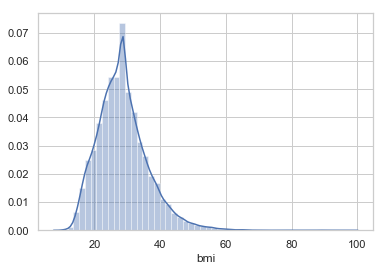

In [33]:
sns.distplot(stroke.bmi)

In [34]:
bmi = stroke[['bmi', 'heart_disease']]
bmi.head()

,bmi,heart_disease
0,18.0,0
1,39.2,0
2,17.6,0
3,35.9,0
4,19.1,0


In [35]:
heart0 = []
heart1 = []
for index, item in enumerate(bmi['heart_disease']):
    if item == 0:
        heart0.append(bmi['bmi'][index])
    else:
        heart1.append(bmi['bmi'][index])



Text(0, 0.5, 'Frequency Density')

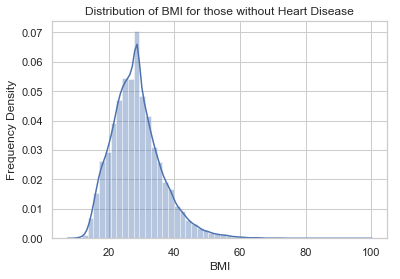

In [36]:
sns.distplot(heart0)
plt.title('Distribution of BMI for those without Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frequency Density')

In [37]:
print(np.mean(heart0))

28.512695011251765


Text(0, 0.5, 'Frequency Density')

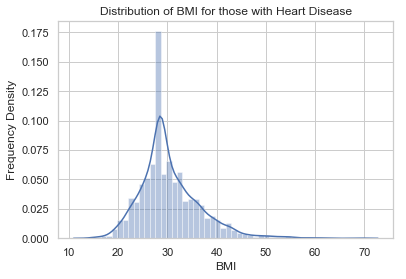

In [38]:
sns.distplot(heart1)
plt.title('Distribution of BMI for those with Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frequency Density')

In [39]:
print(np.mean(heart1))

30.45629473863296


In [40]:
stats.ttest_ind(heart0, heart1, equal_var = False)#setting equal_var to False creates a Welch's t-test.

Ttest_indResult(statistic=-13.778745106535446, pvalue=1.273528822838188e-41)

In [41]:
def cohensd(list1, list2):
    s_pooled = np.sqrt(((len(list1)-1)*(np.std(list1))**2+(len(list2)-1)*(np.std(list2))**2)/((len(list1)+len(list2)+2)))
    d = (np.mean(list1) - np.mean(list2))/s_pooled
    return d
cohensd(heart1, heart0)  

0.25485107676750246

Text(0, 0.5, 'Frequency Density')

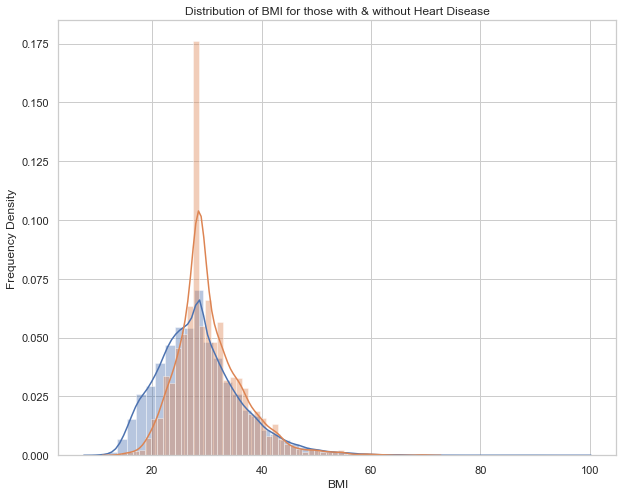

In [42]:
plt.figure(figsize = (10,8))
sns.set(style ='whitegrid')
sns.distplot(heart0)
sns.distplot(heart1)

plt.title('Distribution of BMI for those with & without Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frequency Density')


<h3> Conclusion </h3>
    

As we can see above, the p-value from the Welch's t-test is extremely small (1.27x10^-41) which means that we can have a large degree of confidence in the rejection of our null hypothesis.

Additionally, we have calculated Cohen's d to indicate the effect size of BMI on Heart Disease. Those with heart disease have a higher BMI on average than those without. The exact effect size calculated was 0.25 which indicates a small effect size if following the advice given by Cohen and Sawilowsky (https://en.wikipedia.org/wiki/Effect_size#Cohen's_d)

Very small   =	0.01	
Small	     =  0.20	
Medium	     =  0.50	
Large	     =  0.80	
Very large	 =  1.20	
Huge	     =  2.0	



In [43]:
print(len(heart0))
print(len(heart1))
print(len(heart1)/len(heart0))

statsmodels.stats.power.tt_ind_solve_power(effect_size=0.254851, nobs1=41338, alpha=0.05, power=None, ratio=0.049881464995, alternative='two-sided')

41338
2062
0.04988146499588756


1.0

Above is the function to calculate the power which is the probability of not getting a type II error. This takes in the variables: effect size, number of observations and alpha and outputs the power. An effect size of 0.8 or greater is considered meaningful. Therefore an effect size of 1 leads us to a certainty of not having a type II error or false negative.